In [42]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
from sklearn.model_selection import train_test_split

In [3]:
# Verifica la ruta y el delimitador del archivo CSV
df = pd.read_csv('.\Archivos\Dataset objetivo.csv', engine='python', delimiter=",")
df = df.replace(',', '.', regex=True)
df['realSum'] = df['realSum'].astype(float)
df['dayPrice'] = df['dayPrice'].astype(float)
df['dayPriceByPerson'] = df['dayPriceByPerson'].astype(float)
df['dist'] = df['dist'].astype(float)
df['metro_dist']= df['metro_dist'].astype(float)
df['attr_index_norm']= df['attr_index_norm'].astype(float)
df['person_capacity']= df['person_capacity'].astype(int)
dataset = df

# Realiza las operaciones que necesites con el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   dayPrice                    51707 non-null  float64
 2   dayPriceByPerson            51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  int32  
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  int64  
 11  guest_satisfaction_overall  51707 non-null  int64  
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

## Modelos de Predicción


## Modelo de Predicción 1
#### Predecir precio por dia (dayPrice) a traves de la distancia al centro en cuadras

In [4]:
# de km a cuadras:
from_km_to_blocks = 0.1
df["dist_en_cuadras"] = df["dist"] / from_km_to_blocks
df

,realSum,dayPrice,dayPriceByPerson,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city,dist_en_cuadras
0,194.033698,48.508425,97.016849,Private room,False,True,2,False,1,0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,amsterdam,50.229638
1,344.245776,86.061444,344.245776,Private room,False,True,4,False,0,0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,amsterdam,4.883893
2,264.101422,66.025356,132.050711,Private room,False,True,2,False,0,1,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,amsterdam,57.483119
3,433.529398,108.382349,433.529398,Private room,False,True,4,False,0,1,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,amsterdam,3.848620
4,485.552926,121.388231,242.776463,Private room,False,True,2,True,0,0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,amsterdam,5.447382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,178.984643,1073.907861,Entire home/apt,False,False,6,False,0,1,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,vienna,5.301808
51703,304.793960,76.198490,152.396980,Entire home/apt,False,False,2,False,0,0,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,vienna,8.102052
51704,637.168969,159.292242,318.584484,Entire home/apt,False,False,2,False,0,0,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,vienna,9.940513
51705,301.054157,75.263539,150.527079,Private room,False,True,2,False,0,0,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,vienna,30.440997


In [5]:
X_row = df.iloc[:, -1].values
X = X_row.reshape(-1,1)
X

array([[50.22963798],
       [ 4.88389289],
       [57.48311915],
       ...,
       [ 9.94051332],
       [30.4409973 ],
       [12.63931726]])

In [6]:
y = df.iloc[:, 2].values #columna dayPrice
y

array([ 97.01684906, 344.24577602, 132.05071122, ..., 318.58448449,
       150.52707851, 133.23048875])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train

array([[43.16048955],
       [35.02750743],
       [10.78494148],
       ...,
       [34.82529544],
       [24.16837991],
       [21.3938255 ]])

In [9]:
y_train

array([213.43399421, 138.40506862, 243.2451433 , ..., 382.37487184,
       137.08902585, 144.05226301])

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([223.42347188, 212.63231005, 257.54573194, ..., 242.35761121,
       253.18795588, 220.40948484])

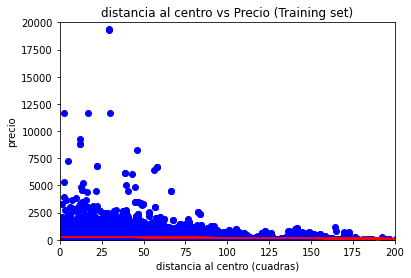

In [12]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Training set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 20000
x_limit = 200
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

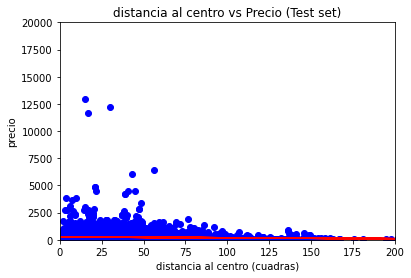

In [13]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Test set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 20000
x_limit = 200
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

In [14]:
r2 = r2_score(y_test, y_pred)
r2

0.0034571211985564565

## Predicción 2
#### Predecir precio por dia por persona (dayPriceByPerson) a traves de la capacidad del alojamiento

In [15]:
X = dataset.iloc[:, [6]].values #Seleccionar variables person_capacity
y = dataset.iloc[:, 2].values #Seleccionar la variable independiente --> dayPriceByPerson

In [16]:
X

array([[2],
       [4],
       [2],
       ...,
       [2],
       [2],
       [4]])

In [17]:
y

array([ 97.01684906, 344.24577602, 132.05071122, ..., 318.58448449,
       150.52707851, 133.23048875])

### 2) Dividir el dataset en Training y Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 78)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
print('coeficiente = ' + str(regressor.coef_) + ', intercepto = ' + str(regressor.intercept_))

coeficiente = [126.6996982], intercepto = -158.41656685151943


#### Predecir los resultados del dataset de Test

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([601.78162232,  94.98282954, 221.68252774, ..., 601.78162232,
       348.38222593, 348.38222593])

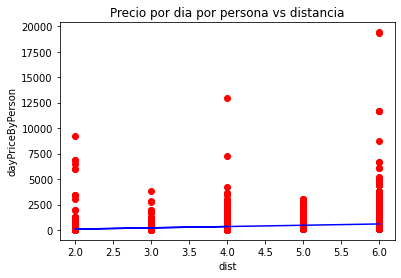

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Precio por dia por persona vs distancia')
plt.xlabel('dist')
plt.ylabel('dayPriceByPerson')
plt.show()

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [23]:
r2 = r2_score(y_test, y_pred)
r2

0.20358261999257177

## Predicción 3
#### Predecir precio por dia (dayPrice), teniendo en cuenta el indice de atraccion del lugar

In [24]:
X_row = dataset.iloc[:, 16].values # Seleccionar variable attr_indice_normalizado
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 1].values # Seleccionar la variable independiente --> dayPrice

In [56]:
X

array([[ 4.16670787],
       [33.42120862],
       [ 3.9859077 ],
       ...,
       [12.10792146],
       [ 7.82280266],
       [10.77426362]])

In [57]:
y

array([ 48.50842453,  86.061444  ,  66.02535561, ..., 159.29224225,
        75.26353926,  33.30762219])

### 2) Dividir el dataset en Training y Test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 60)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [59]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 4) Predecir los resultados del dataset de Test

In [60]:
y_pred = regressor.predict(X_test)
y_pred

array([76.03136619, 96.55682835, 47.46135583, ..., 96.91738596,
       79.6766782 , 49.16991119])

#### Predecir 1 valor puntual

In [61]:
valor_attr = 4.16
valor_x_array = np.array([valor_attr])
pred_valor_x = regressor.predict(valor_x_array.reshape(-1,1))
pred_valor_x

array([46.95230953])

### Visualizar los resultados con el dataset de Training

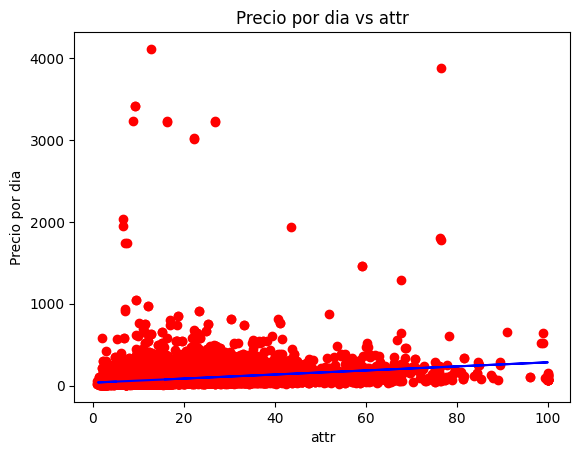

In [62]:
plt.scatter(X_train.tolist(), y_train.tolist(), color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Precio por dia vs attr')
plt.xlabel('attr')
plt.ylabel('Precio por dia')
plt.show()

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.062409178683917044

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

1717202.4040502375

## Predicción 4
### Predecir precio por dia (dayPrice), teniendo en cuenta la distancia al metro y al centro

In [63]:
X = dataset.iloc[:, [13, 14]].values #Seleccionar variables metro_dist y dist
y = dataset.iloc[:, 1].values #Seleccionar la variable independiente --> dayPrice

In [64]:
X

array([[5.0229638 , 2.53938   ],
       [0.48838929, 0.23940392],
       [5.74831192, 3.65162129],
       ...,
       [0.99405133, 0.20253882],
       [3.04409973, 0.28743468],
       [1.26393173, 0.48090251]])

In [65]:
y

array([ 48.50842453,  86.061444  ,  66.02535561, ..., 159.29224225,
        75.26353926,  33.30762219])

### 2) Dividir el datase en Training y Test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [67]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 4) Predecir los resultados del dataset de Test

In [68]:
y_pred = regressor.predict(X_test)
y_pred

array([71.64785784, 72.76176831, 69.45263464, ..., 72.2416825 ,
       73.57632813, 72.80307434])

#### Predecir 1 valor puntual

In [69]:
valor_dist = 5.022
valor_metro_dist = 2.539
valor_x_array = np.array([valor_dist, valor_metro_dist])
pred_valor_x = regressor.predict(valor_x_array.reshape(-2,2))
pred_valor_x

array([60.14028657])

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [70]:
r2 = r2_score(y_test, y_pred)
r2

0.004052244278330175

## Predicción 5
### Predecir índice de atracción (attr_index_norm), teniendo en cuenta la distancia al centro (dist)

In [71]:
X_row = dataset.iloc[:, 13].values # Seleccionar variable dist
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 16].values # Seleccionar la variable independiente --> attr_indice_normalizado

In [72]:
X

array([[5.0229638 ],
       [0.48838929],
       [5.74831192],
       ...,
       [0.99405133],
       [3.04409973],
       [1.26393173]])

In [73]:
y

array([ 4.16670787, 33.42120862,  3.9859077 , ..., 12.10792146,
        7.82280266, 10.77426362])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = regressor.predict(X_test)
y_pred

array([11.22535898,  9.97003098, 15.19477666, ..., 13.42795363,
       14.68783975, 10.87474406])

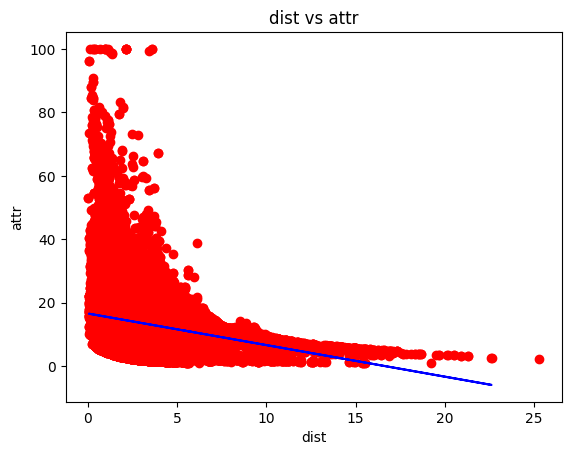

In [77]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('dist vs attr')
plt.xlabel('dist')
plt.ylabel('attr')
plt.show()

In [78]:
r2 = r2_score(y_test, y_pred)
r2

0.056636691822262275

## Predicción 6
### Predecir guest_satisfaction_overall a través del cleanliness_rating	

In [79]:
X_row = dataset.iloc[:, 10].values # Seleccionar variable cleanlinness_reating
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 11].values # Seleccionar la variable independiente --> guest_satisfaction_overall

In [80]:
X

array([[10],
       [ 8],
       [ 9],
       ...,
       [10],
       [10],
       [10]], dtype=int64)

In [81]:
y

array([93, 85, 87, ..., 93, 87, 93], dtype=int64)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = regressor.predict(X_test)
y_pred

array([96.73017215, 96.73017215, 89.98867207, ..., 83.247172  ,
       96.73017215, 96.73017215])

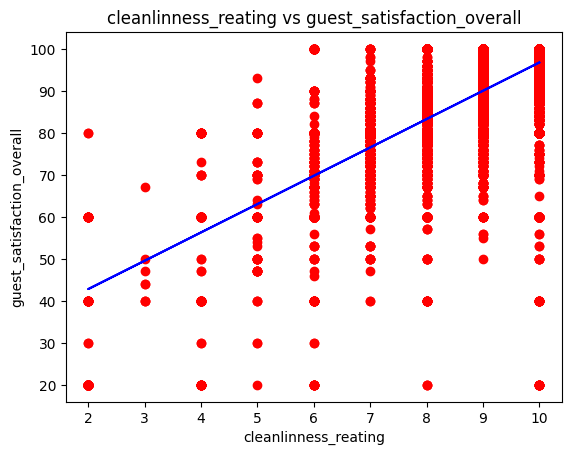

In [85]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('cleanlinness_reating vs guest_satisfaction_overall')
plt.xlabel('cleanlinness_reating')
plt.ylabel('guest_satisfaction_overall')

plt.show()

In [86]:
r2 = r2_score(y_test, y_pred)
r2

0.45661094020781845

## Predicción 7
### Predecir host_is_superhost a través del cleanliness_rating y guest_satisfaction_overall

In [25]:
dataset = df

X = dataset.iloc[:, [10, 11]].values # Seleccionar variables cleanliness_rating y guest_satisfaction_overall
dataset = pd.get_dummies(dataset, columns=['host_is_superhost'], drop_first=True).replace({True:1, False:0})
y = dataset.iloc[:,-1].values #Recortamos para hacer numéricos los True/False de host_is_superhost. Devuelve una columna con True=1 - False=0

dataset

,realSum,dayPrice,dayPriceByPerson,room_type,room_shared,room_private,person_capacity,multi,biz,cleanliness_rating,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city,dist_en_cuadras,host_is_superhost_True
0,194.033698,48.508425,97.016849,Private room,0,1,2,1,0,10,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,1,amsterdam,50.229638,0
1,344.245776,86.061444,344.245776,Private room,0,1,4,0,0,8,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,1,amsterdam,4.883893,0
2,264.101422,66.025356,132.050711,Private room,0,1,2,0,1,9,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,1,amsterdam,57.483119,0
3,433.529398,108.382349,433.529398,Private room,0,1,4,0,1,9,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,1,amsterdam,3.848620,0
4,485.552926,121.388231,242.776463,Private room,0,1,2,0,0,10,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,1,amsterdam,5.447382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,178.984643,1073.907861,Entire home/apt,0,0,6,0,1,10,...,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,0,vienna,5.301808,0
51703,304.793960,76.198490,152.396980,Entire home/apt,0,0,2,0,0,8,...,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,0,vienna,8.102052,0
51704,637.168969,159.292242,318.584484,Entire home/apt,0,0,2,0,0,10,...,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,0,vienna,9.940513,0
51705,301.054157,75.263539,150.527079,Private room,0,1,2,0,0,10,...,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,0,vienna,30.440997,0


In [26]:
X

array([[10, 93],
       [ 8, 85],
       [ 9, 87],
       ...,
       [10, 93],
       [10, 87],
       [10, 93]], dtype=int64)

In [27]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

In [29]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = regressor.predict(X_test)
print(y_pred.sum())

0


In [31]:
r2 = r2_score(y_test, y_pred)
r2

-0.32132362335505316

### Matriz de confusión

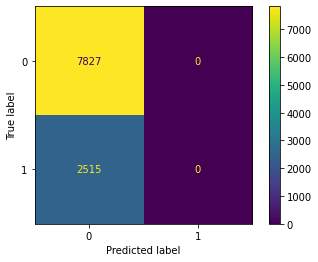

In [35]:
cm = plot_confusion_matrix(regressor, X_test, y_test)

## Predicción 9
### Predecir room_type a través del dayPriceByPerson

In [ ]:
dataset = df

X = dataset.iloc[:, [3, 13]].values # Seleccionar variables dayPriceByPerson
#Convertimos las variables categóricas en numéricas, y creamos una nueva columna:
category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
dataset['room_type_category'] = dataset['room_type'].map(category_order)
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[ 48.50842453,   1.        ],
       [ 86.061444  ,   1.        ],
       [ 66.0253556 ,   1.        ],
       ...,
       [159.2922423 ,   1.        ],
       [ 75.26353925,   1.        ],
       [ 33.30762218,   1.        ]])

In [ ]:
y

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

c:\Users\Leo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

-0.5457844943060435

### Matriz de confusión

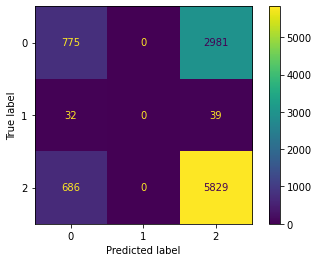

In [ ]:
plot_confusion_matrix(regressor, X_test, y_test)

## Predicción 10
### Predecir city a través del dayPrice y room_type

In [99]:
dataset = df

#Convertimos las variables categóricas en numéricas, y creamos 2 nuevas columna:
city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin':3,'budapest':4, 'lisbon':5, 'london':6, 'paris':7, 'rome':8, 'vienna':9}
dataset['city_category'] = dataset['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
dataset['room_type_category'] = dataset['room_type'].map(room_category_order)
X = dataset.iloc[:, [1, -1]].values # Seleccionar variables dayPrice y room_type_category

y = dataset.iloc[:,-2].values

In [79]:
X

array([[ 48.50842453,   0.        ],
       [ 86.061444  ,   0.        ],
       [ 66.02535561,   0.        ],
       ...,
       [159.29224225,   2.        ],
       [ 75.26353926,   0.        ],
       [ 33.30762219,   0.        ]])

In [100]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

c:\Users\leoca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([6, 6, 7, ..., 7, 6, 8], dtype=int64)

In [102]:
r2 = r2_score(y_test, y_pred)
r2

-0.48507103387201345

### Matriz de confusión

In [103]:
plot_confusion_matrix(regressor, X_test, y_test)

NameError: name 'plot_confusion_matrix' is not defined

## Predicción exploratoria de la variable objetivo room_type

##### Aquí se desarrolla un algoritmo que explora todas las combinaciones de variables, para quedarse sólo con aquellas que mejoran el r2 score

In [39]:
#Cuantificación de variables categóricas
city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin': 3, 'budapest': 4, 'lisbon': 5, 'london': 6, 'paris': 7, 'rome': 8, 'vienna': 9}
df['city_category'] = df['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
df['room_type_category'] = df['room_type'].map(room_category_order)

columnas = ['dayPrice',
            'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
            'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index',
            'attr_index_norm', 'rest_index', 'rest_index_norm', 'city_category']

# Generar todas las combinaciones posibles de columnas con 3 a 5 elementos
combinaciones_columnas = []
for r in range(3, 6):
    combinaciones_columnas.extend(combinations(columnas, r))

# Variables para almacenar la mejor combinación y su precisión correspondiente
mejor_combinacion = None
mejor_precision = 0.0

# Iterar sobre cada combinación de columnas
for cols in combinaciones_columnas:
    # Obtener las columnas de características y la columna objetivo
    X = df[list(cols)]
    y = df['room_type_category']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión logística con un mayor número de iteraciones
    model = LogisticRegression(max_iter=1000000)
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    precision = accuracy_score(y_test, y_pred)
    
    # Verificar si esta combinación tiene la mejor precisión hasta ahora
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_combinacion = cols
        # Mostrar la combinación y precisión actual
        print(f"Mejor combinación encontrada:")
        print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
        print(f"Precisión del modelo: {mejor_precision}")
        print("------------------------")

# Mostrar la mejor combinación encontrada y su precisión correspondiente
print("Mejor combinación final:")
print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
print(f"Precisión del modelo: {mejor_precision}")

Mejor combinación encontrada:
Columnas utilizadas: dayPrice, person_capacity, host_is_superhost
Precisión del modelo: 0.7637787661960936
------------------------
Mejor combinación encontrada:
Columnas utilizadas: dayPrice, person_capacity, multi
Precisión del modelo: 0.7727712241345968
------------------------
Mejor combinación encontrada:
Columnas utilizadas: dayPrice, person_capacity, bedrooms
Precisión del modelo: 0.7933668536066525
------------------------


KeyboardInterrupt: 

## Predicción de la variable objetivo room_type

##### Aquí se desarrolla un algoritmo que toma el mejor caso de la exploración anterior, el cual relaciona la variable room_type con: dayPrice, person_capacity y bedrooms

In [45]:
#Cuantificación de variables categóricas
city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin': 3, 'budapest': 4, 'lisbon': 5, 'london': 6, 'paris': 7, 'rome': 8, 'vienna': 9}
df['city_category'] = df['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
df['room_type_category'] = df['room_type'].map(room_category_order)

columnas = ['dayPrice', 'person_capacity', 'bedrooms']

# Obtener las columnas de características y la columna objetivo
X = df[list(columnas)]
y = df['room_type_category']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística con un mayor número de iteraciones
model = LogisticRegression(max_iter=1000000)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {precision}")

Precisión del modelo: 0.7933668536066525


## Predicción de la variable objetivo dayPrice

##### Aquí se desarrolla un algoritmo que explora todas las combinaciones de variables, para quedarse sólo con aquellas que mejoran el r2 score

In [58]:
#Cuantificación de variables categóricas
city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin': 3, 'budapest': 4, 'lisbon': 5, 'london': 6, 'paris': 7, 'rome': 8, 'vienna': 9}
df['city_category'] = df['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
df['room_type_category'] = df['room_type'].map(room_category_order)

columnas = ['room_type_category',
            'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
            'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 
            'attr_index_norm', 'rest_index', 'rest_index_norm', 'city_category']

# Generar todas las combinaciones posibles de columnas con 3 a 5 elementos
combinaciones_columnas = []
for r in range(2,17):
    combinaciones_columnas.extend(combinations(columnas, r))

# Variables para almacenar la mejor combinación y su precisión correspondiente
mejor_combinacion = None
mejor_precision = 0.0

# Iterar sobre cada combinación de columnas
for cols in combinaciones_columnas:
    # Obtener las columnas de características y la columna objetivo
    X = df[list(cols)]
    y = df['dayPrice']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión logística con un mayor número de iteraciones
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = regressor.predict(X_test)

    # Calcular la precisión del modelo
    precision = r2_score(y_test, y_pred)
    
    # Verificar si esta combinación tiene la mejor precisión hasta ahora
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_combinacion = cols
        # Mostrar la combinación y precisión actual
        print(f"Mejor combinación encontrada:")
        print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
        print(f"Precisión del modelo: {mejor_precision}")
        print("------------------------")

# Mostrar la mejor combinación encontrada y su precisión correspondiente
print("Mejor combinación final:")
print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
print(f"Precisión del modelo: {mejor_precision}")

Mejor combinación encontrada:
Columnas utilizadas: room_type_category, person_capacity
Precisión del modelo: 0.04480595269694643
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, bedrooms
Precisión del modelo: 0.06831962612943099
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, attr_index_norm
Precisión del modelo: 0.11153447700697239
------------------------
Mejor combinación encontrada:
Columnas utilizadas: person_capacity, attr_index_norm
Precisión del modelo: 0.12943793857775576
------------------------
Mejor combinación encontrada:
Columnas utilizadas: bedrooms, attr_index_norm
Precisión del modelo: 0.14423873977527735
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, bedrooms, attr_index_norm
Precisión del modelo: 0.16118613124863135
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, person_capacity

KeyboardInterrupt: 

## Predicción de la variable objetivo dayPrice

##### Aquí se desarrolla un algoritmo que toma el mejor caso de la exploración anterior, el cual relaciona la variable dayPrice con: room_type_category, person_capacity, bedrooms, dist, metro_dist, attr_index_norm

In [59]:
#Cuantificación de variables categóricas
city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin': 3, 'budapest': 4, 'lisbon': 5, 'london': 6, 'paris': 7, 'rome': 8, 'vienna': 9}
df['city_category'] = df['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
df['room_type_category'] = df['room_type'].map(room_category_order)

columnas = ['room_type_category', 'person_capacity', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm']

# Obtener las columnas de características y la columna objetivo
X = df[list(columnas)]
y = df['dayPrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística con un mayor número de iteraciones
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
precision = r2_score(y_test, y_pred)

print(f"Precisión del modelo: {precision}")

Precisión del modelo: 0.16720671010560106


##### Como se ve, el r2 score no es bueno, con lo cual se descarta este modelo de predicción.